In [1]:
# 데이터 처리
import numpy as np
import pandas as pd

In [2]:
# "전국CCTV표준데이터" CSV 파일 로딩 
df_cctv = pd.read_csv('./data/전국CCTV표준데이터.csv', encoding="EUC-KR", header=0, 
                           names=['admin_nm', 'addr_rd', 'addr_jb', 'purpose', 'cctv_cnt', 'pixel', 'direction', 'period', 'date_install', 'tel', 'lat', 'lon', 'date_make', 'offer_admin_cd', 'offer_admin_nm'], 
                           dtype={'cctv_cnt':object, 'pixel':object, 'period':object, 'lat':float, 'lon':float, 'offer_admin_cd':object}, 
                  thousands = ',', #천단위 쉼표 제거   
                  index_col=None) 

In [3]:
df_cctv.dropna(subset=['lat'],axis=0,inplace=True)  #거리 비교를 위해 null 삭제
df_cctv.dropna(subset=['lon'],axis=0,inplace=True)  #거리 비교를 위해 null 삭제

In [4]:
df_cctv.head()

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm
0,경상남도 김해시청,NaN,경상남도 김해시 구산동 1072-19,생활방범,3,200,현대병원뒤,30,2019-11,055-330-4741,35.249247,128.871639,2019-06-26,5350000,경상남도 김해시
1,경상남도 김해시청,NaN,경상남도 김해시 구산동 305-15,생활방범,2,200,목화골공원,30,2019-12,055-330-4741,35.247411,128.873605,2019-06-26,5350000,경상남도 김해시
2,경상남도 김해시청,NaN,경상남도 김해시 삼계동 1484-14,생활방범,2,200,정원빌라,30,2019-06,055-330-4741,35.261728,128.874144,2019-06-26,5350000,경상남도 김해시
3,경상남도 김해시청,NaN,경상남도 김해시 구산동 1043,생활방범,4,200,최가아구찜,30,2019-05,055-330-4741,35.247076,128.872461,2019-06-26,5350000,경상남도 김해시
4,경상남도 김해시청,NaN,경상남도 김해시 구산동 175-10,생활방범,2,200,동호맨션,30,2019-12,055-330-4741,35.241185,128.877334,2019-06-26,5350000,경상남도 김해시


In [37]:
df_cctv_sl2 = df_cctv[ df_cctv['offer_admin_cd'].str.contains('110000') == True ]
#df_cctv_sl2.info()
df_cctv_sl2.head()

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl
7109,서울특별시 은평구청,진관길 39,진관동 125-22 화장실맞은편,생활방범,2,200,360도 전방면,30,2019-09,02-351-6383,37.640964,126.942895,2020-01-01,3110000,서울특별시 은평구,False
7110,서울특별시 은평구청,진관길 10,진관동 9991-107 옆삼거리,생활방범,3,200,360도 전방면,30,2016-12,02-351-6383,37.641920,126.939810,2020-01-01,3110000,서울특별시 은평구,False
7111,서울특별시 은평구청,진관길 21-20,진관동 9993-414 앞,생활방범,3,200,360도 전방면,30,2016-12,02-351-6383,37.642166,126.940033,2020-01-01,3110000,서울특별시 은평구,False
7112,서울특별시 은평구청,연서로48길 12 513동 앞 사거리,진관동 143-22 513동 앞 사거리,생활방범,3,200,360도 전방면,30,2016-12,02-351-6383,37.637511,126.935300,2020-01-01,3110000,서울특별시 은평구,False
7113,서울특별시 은평구청,연서로 487 527동 앞,진관동 141-20 527동 앞,생활방범,1,200,360도 전방면,30,2016-12,02-351-6383,37.637846,126.934171,2020-01-01,3110000,서울특별시 은평구,False


In [38]:
# 시도 코드 2자리가 11로 시작하는 데이터가 있는지 검토 
df_cctv['sl'] = df_cctv['offer_admin_cd'].str.slice(start=0, stop=2) == '11'
df_cctv_sl3 = df_cctv[df_cctv['sl'] == True ]
df_cctv_sl3

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl


In [36]:
df_cctv_sl = df_cctv[ df_cctv['admin_nm'].str.contains('서울특별시') == True ]
df_cctv_sl.info()
df_cctv_sl.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 86 to 49774
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   admin_nm        7019 non-null   object 
 1   addr_rd         6684 non-null   object 
 2   addr_jb         6364 non-null   object 
 3   purpose         7019 non-null   object 
 4   cctv_cnt        7019 non-null   object 
 5   pixel           5844 non-null   object 
 6   direction       4126 non-null   object 
 7   period          6573 non-null   object 
 8   date_install    6224 non-null   object 
 9   tel             7019 non-null   object 
 10  lat             7019 non-null   float64
 11  lon             7019 non-null   float64
 12  date_make       7019 non-null   object 
 13  offer_admin_cd  7019 non-null   object 
 14  offer_admin_nm  7019 non-null   object 
 15  sl              7019 non-null   bool   
dtypes: bool(1), float64(2), object(13)
memory usage: 884.2+ KB


,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구,False
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구,False
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구,False
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구,False
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구,False


In [45]:
import geopandas as gpd

import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리 
from fiona.crs import from_epsg # 좌표변환 

import pyproj  # 좌표변환
from pyproj import Proj, transform

import shapely
from shapely.geometry.multipolygon import MultiPolygon 
from shapely.geometry import LineString, Point
from shapely import wkt

In [132]:
# 좌표 속성을 가지고 지오메트리 데이터를 생성
geom_cctv_sl01 = gpd.points_from_xy(df_cctv_sl.lon, df_cctv_sl.lat)
geom_cctv_sl01[0:3]

In [43]:
# 기존의 데이터프레임 컬럼명을 가져옴 
columns = df_cctv_sl.columns

In [133]:
# 속성 데이터프레임에 Geometry를 붙여서 공간 데이터프레임을 생성 
gdf_cctv_sl01 = gpd.GeoDataFrame(df_cctv_sl[columns], geometry=geom_cctv_sl01, crs=from_epsg(4326))
gdf_cctv_sl01.head()

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl,geometry
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88696 37.51935)
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88211 37.52018)
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88611 37.51588)
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.90363 37.51447)
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88332 37.51894)


In [122]:
# 좌표계 조회
gdf_cctv_sl01.crs

{'init': 'epsg:4326', 'no_defs': True}

In [ ]:
# 좌표계 설정 
#gdf_cctv_sl01.crs = "epsg:4326"

In [134]:
# 좌표계 변환
gdf_cctv_sl01_3857 = gdf_cctv_sl01.to_crs(epsg=3857) 

C:\Users\dhl\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [135]:
gdf_cctv_sl01_3857.crs

{'init': 'epsg:3857', 'no_defs': True}

In [136]:
# Geometry를 이용하여 X, Y 좌표 항목을 생성 
gdf_cctv_sl01_3857["x"] = gdf_cctv_sl01_3857.geometry.x
gdf_cctv_sl01_3857["y"] = gdf_cctv_sl01_3857.geometry.y
gdf_cctv_sl01_3857.head()

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl,geometry,x,y
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구,False,POINT (14124991.821 4511747.327),1.412499e+07,4.511747e+06
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구,False,POINT (14124451.882 4511863.040),1.412445e+07,4.511863e+06
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구,False,POINT (14124897.547 4511259.295),1.412490e+07,4.511259e+06
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구,False,POINT (14126847.579 4511062.359),1.412685e+07,4.511062e+06
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구,False,POINT (14124586.369 4511688.705),1.412459e+07,4.511689e+06


In [126]:
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

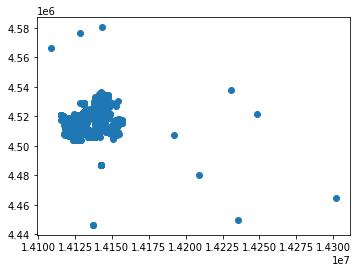

In [137]:
gdf_cctv_sl01_3857.plot() #ax=ax, color='red')

plt.show()

<AxesSubplot:>

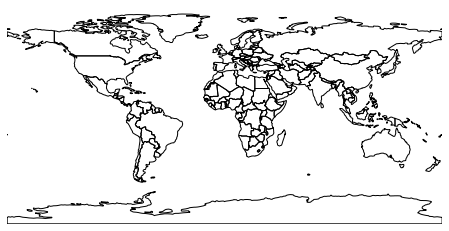

In [138]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gplt.polyplot(world, figsize=(8, 4))

<AxesSubplot:>

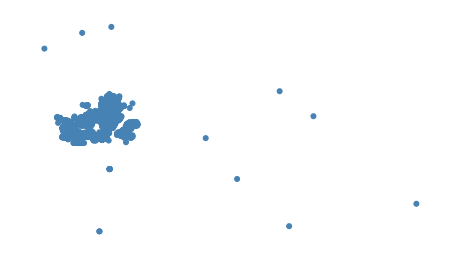

In [139]:
gplt.pointplot(gdf_cctv_sl01)

C:\Users\dhl\anaconda3\lib\site-packages\geoplot\geoplot.py:720: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '
C:\Users\dhl\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


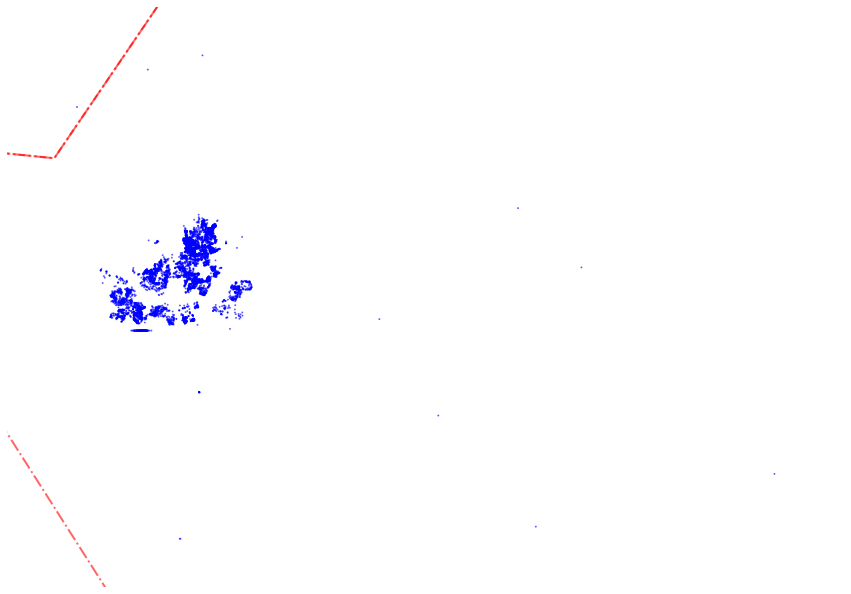

In [140]:
fig = plt.figure(figsize=(15,12))
proj = gcrs.WebMercator()
ax1 = plt.subplot(111, projection=proj) 

gplt.polyplot(world, facecolor='none', edgecolor='red', linestyle='-.', linewidth=2, alpha=0.6, zorder=1, ax=ax1)  
gplt.pointplot(gdf_cctv_sl01, s=1.0, color='blue', alpha=0.5, ax=ax1)
#gplt.webmap(world, ax=ax1, extent=gdf_cctv_sl01.total_bounds) 

fig = plt.gcf()
#plt.savefig("./image/공간밀도_2015-2019.png", bbox_inches='tight', pad_inches=0)

Matplotlib의 Figure와 Axes
https://wikidocs.net/4763

In [ ]:
#이상치 체크 및 제거
from scipy.stats import zscore

In [144]:
gdf_cctv_sl01['zscore_lon'] = zscore(gdf_cctv_sl01['lon'])
threshold = 3 #2는 약 95%, 3을 적용하면 약 99.73%
gdf_cctv_sl01['outliers'] = np.where((gdf_cctv_sl01['zscore_lon'] - threshold > 0), True, np.where(gdf_cctv_sl01['zscore_lon'] + threshold < 0, True, False))
gdf_cctv_sl01.head()

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,sl,geometry,zscore_lon,outliers
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88696 37.51935),-1.348028,False
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88211 37.52018),-1.406838,False
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88611 37.51588),-1.358297,False
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.90363 37.51447),-1.145901,False
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구,False,POINT (126.88332 37.51894),-1.392190,False


In [145]:
gdf_cctv_sl02 = gdf_cctv_sl01[ gdf_cctv_sl01['outliers'] == False ]

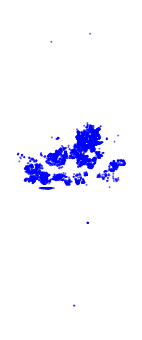

In [147]:
#ax = gplt.webmap(gdf_cctv_sl02, projection=gcrs.WebMercator(), figsize=(15, 15) ) #, extent=gdf_cctv_sl01.total_bounds) 
#gplt.polyplot(world, facecolor='none', edgecolor='red', linestyle='-.', linewidth=1, alpha=0.5, zorder=1, projection=gcrs.WebMercator(), ax=ax )
gplt.pointplot(gdf_cctv_sl02, s=1.0, color='blue', alpha=0.5) #, ax=ax)  #, extent=gdf_cctv_sl01.total_bounds

fig = plt.gcf()

In [148]:
gdf_cctv_sl02['zscore_lat'] = zscore(gdf_cctv_sl02['lat'])
threshold = 3 #2는 약 95%, 3을 적용하면 약 99.73%
gdf_cctv_sl02['outliers'] = np.where((gdf_cctv_sl02['zscore_lat'] - threshold > 0), True, np.where(gdf_cctv_sl02['zscore_lat'] + threshold < 0, True, False))
gdf_cctv_sl03 = gdf_cctv_sl02[ gdf_cctv_sl02['outliers'] == False ]

C:\Users\dhl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dhl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


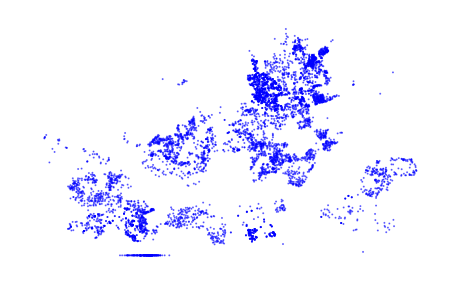

In [149]:
gplt.pointplot(gdf_cctv_sl03, s=1.0, color='blue', alpha=0.5) #, ax=ax)  #, extent=gdf_cctv_sl01.total_bounds
fig = plt.gcf()

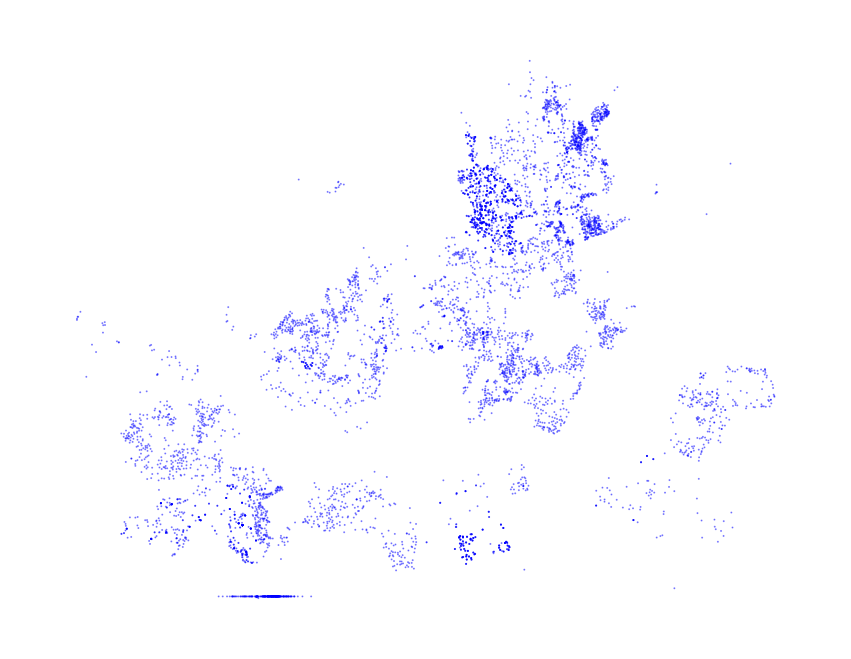

In [154]:
gplt.pointplot(gdf_cctv_sl03, s=1.0, color='blue', alpha=0.4, projection=gcrs.WebMercator(), figsize=(15, 15))
fig = plt.gcf()

In [151]:
# SHP 저장
gdf_cctv_sl03.to_file('./data/gdf_cctv_sl03.shp', encoding='utf-8')